# Career Shifterz
Nama :
- Auviera Pascafiwi
- Fahmy Rafian S
- Fu’ad Saifuddin
- Indra Maulidin
- Luthfan Zulfahmi
- Wenvint

## Import Library

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from imblearn import under_sampling, over_sampling

## Read Data

In [2]:
df = pd.read_csv('D:\Rakamyn DS Batch 23\Final Project\Loan Prediction\Training Data.csv')
df.sample(5)

,Id,Income,Age,Experience,Married/Single,House_Ownership,Car_Ownership,Profession,CITY,STATE,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS,Risk_Flag
7775,7776,74431,65,14,single,rented,no,Magistrate,Tirupati[21][22],Andhra_Pradesh,3,14,0
233386,233387,6652567,78,18,single,rented,no,Chef,Deoghar,Jharkhand,3,10,0
39897,39898,4742685,38,2,single,rented,yes,Petroleum_Engineer,Guntakal,Andhra_Pradesh,2,12,0
25408,25409,8986859,56,3,single,owned,yes,Web_designer,Ujjain,Madhya_Pradesh,3,14,0
224180,224181,4794436,46,20,single,rented,no,Design_Engineer,Munger,Bihar,6,10,0


## Label Encoding

In [3]:
mapping_m_s = {
    'single' : 0,
    'married' : 1
}

mapping_car = {
    'no' : 0,
    'yes' :1
}

df['Married/Single'] = df['Married/Single'].map(mapping_m_s)
df['Car_Ownership'] = df['Car_Ownership'].map(mapping_car)

In [4]:
house_category = pd.get_dummies(df['House_Ownership'], prefix='house')

df = df.join(house_category)

In [5]:
df.sample(5)

,Id,Income,Age,Experience,Married/Single,House_Ownership,Car_Ownership,Profession,CITY,STATE,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS,Risk_Flag,house_norent_noown,house_owned,house_rented
57408,57409,8440968,22,12,0,rented,0,Design_Engineer,Saharsa[29],Bihar,5,12,0,0,0,1
156284,156285,4804453,41,0,0,rented,0,Dentist,Bardhaman,West_Bengal,0,14,0,0,0,1
194157,194158,9130139,40,11,1,rented,0,Chef,Gulbarga,Karnataka,5,12,0,0,0,1
130135,130136,1171901,57,10,0,norent_noown,1,Financial_Analyst,Buxar[37],Bihar,9,12,0,1,0,0
24510,24511,2859480,30,14,0,owned,0,Technician,Sri_Ganganagar,Rajasthan,10,12,1,0,1,0


## Split Data Train dan Test

In [6]:
df.columns

Index(['Id', 'Income', 'Age', 'Experience', 'Married/Single',
       'House_Ownership', 'Car_Ownership', 'Profession', 'CITY', 'STATE',
       'CURRENT_JOB_YRS', 'CURRENT_HOUSE_YRS', 'Risk_Flag',
       'house_norent_noown', 'house_owned', 'house_rented'],
      dtype='object')

In [7]:
X = df.drop(columns = ['Id','House_Ownership','Profession','CITY','STATE','Risk_Flag'])
y = df['Risk_Flag']

In [8]:
from sklearn.model_selection import train_test_split

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=42)

## Modeling

In [10]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import AdaBoostClassifier
from xgboost import XGBClassifier

In [11]:
from sklearn import metrics

In [12]:
models = {
    "DecisionTree" : DecisionTreeClassifier(random_state=42),
    "RandomForest" : RandomForestClassifier(random_state=42),
    "KNeighbors" : KNeighborsClassifier(),
    "AdaBoost" : AdaBoostClassifier(random_state=42),
    "XGB" : XGBClassifier()
}

for model_name, clf in models.items() :
    clf.fit(X_train,y_train)
    y_pred = clf.predict(X_test)
    y_pred_proba = clf.predict_proba(X_test)[:,1]
    
    print("Evaluate model: {}".format(model_name))
    
    accuracy_test = metrics.accuracy_score(y_test,y_pred)
    print("Accuracy Test :" + str(round(accuracy_test*100,2)) + '%')
    precission_test = metrics.precision_score(y_test,y_pred,pos_label=1)
    print("Precission Test :" + str(round(precission_test*100,2)) + '%')
    recall_test = metrics.recall_score(y_test,y_pred,pos_label=1)
    print("Recall Test :" + str(round(recall_test*100,2)) + '%')
    f1_test = metrics.f1_score(y_test,y_pred,pos_label=1)
    print("F1 Test :" + str(round(f1_test*100,2)) + '%')
    fpr_test, tpr_test, thresholds_test = metrics.roc_curve(y_test, y_pred_proba, pos_label=1)
    auc_test = metrics.auc(fpr_test, tpr_test)
    print("AUC Test : "+str(round(auc_test*100,2))+'%')
    print("\n")

Evaluate model: DecisionTree
Accuracy Test :88.21%
Precission Test :51.71%
Recall Test :58.06%
F1 Test :54.71%
AUC Test : 85.21%


Evaluate model: RandomForest
Accuracy Test :89.72%
Precission Test :58.64%
Recall Test :54.84%
F1 Test :56.67%
AUC Test : 93.55%


Evaluate model: KNeighbors
Accuracy Test :88.9%
Precission Test :55.19%
Recall Test :50.59%
F1 Test :52.79%
AUC Test : 87.32%


Evaluate model: AdaBoost
Accuracy Test :87.75%
Precission Test :84.62%
Recall Test :0.12%
F1 Test :0.24%
AUC Test : 58.03%


Evaluate model: XGB
Accuracy Test :88.46%
Precission Test :66.79%
Recall Test :11.76%
F1 Test :19.99%
AUC Test : 86.53%




__Kesimpulan__ :
- Berdasarkan hasil uji Korelasi saat proses EDA, __korelasi antara Features dan Label bersifat Non-Linier__ sehingga Model yang __Robust__ terhadap Nilai Non-Linier seperti __Decision Tree, Random Forest Classifier dan K Neighbors Classifier__ akan memiliki Score Performance yang baik.
- Berdasarkan Beberapa Model Algoritma yang telah diuji, Algoritma __Random Forest Classifier__ memiliki Score Performance cukup baik untuk setiap Metricsnya dibandingkan dengan Algoritma yang lain.
- Maka berdasarkan hasil uji coba tersebut, untuk proses selanjutnya akan digunakan Model Algoritma __Random Forest Classifier__.

In [13]:
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train,y_train)

RandomForestClassifier(random_state=42)

In [14]:
y_pred = rf.predict(X_test)
y_pred_proba = rf.predict_proba(X_test)[:,1]
    
accuracy = metrics.accuracy_score(y_test,y_pred)
print("Accuracy :" + str(round(accuracy*100,2)) + '%')
precission = metrics.precision_score(y_test,y_pred,pos_label=1)
print("Precission :" + str(round(precission*100,2)) + '%')
recall = metrics.recall_score(y_test,y_pred,pos_label=1)
print("Recall :" + str(round(recall*100,2)) + '%')
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred_proba, pos_label=1)
auc_test = metrics.auc(fpr, tpr)
print("AUC : "+str(round(auc_test*100,2))+'%')

Accuracy :89.72%
Precission :58.64%
Recall :54.84%
AUC : 93.55%


Text(0.5, 1.0, 'feature importance score')

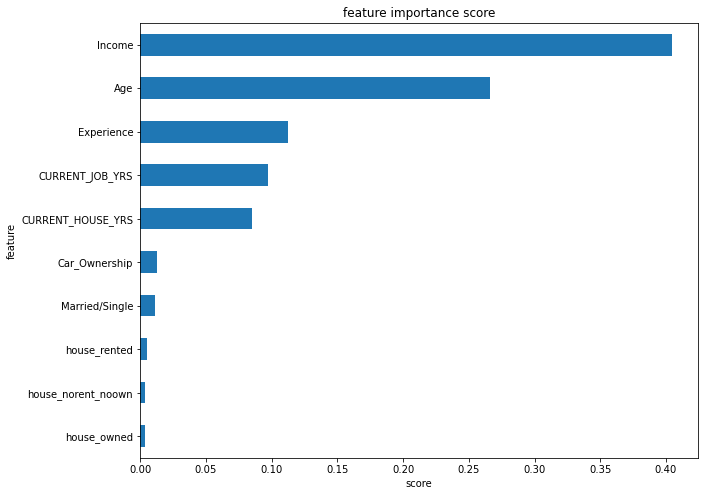

In [15]:
feat_importances = pd.Series(rf.feature_importances_, index=X.columns)
ax = feat_importances.nlargest(25).plot(kind='barh', figsize=(10, 8))
ax.invert_yaxis()

plt.xlabel('score')
plt.ylabel('feature')
plt.title('feature importance score')

Log Performance

In [16]:
performance_log = pd.DataFrame(columns=["Experiment","Recall","Accuracy","Precission","AUC"])

perf = {
    "Experiment": "initial model (Random Forest)",
    "Recall": str(round(recall*100,2))+'%',
    "Accuracy": str(round(accuracy*100,2))+'%',
    "Precission": str(round(precission*100,2))+'%',
    "AUC" : str(round(auc_test*100,2))+'%'
}
performance_log = performance_log.append(perf, ignore_index=True)

C:\Users\ASUS\AppData\Local\Temp/ipykernel_15720/3942090338.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  performance_log = performance_log.append(perf, ignore_index=True)


In [17]:
performance_log

,Experiment,Recall,Accuracy,Precission,AUC
0,initial model (Random Forest),54.84%,89.72%,58.64%,93.55%


## Model Evaluation : Pemilihan dan perhitungan Metrics

### Confusion Matrix

In [18]:
from sklearn.metrics import confusion_matrix

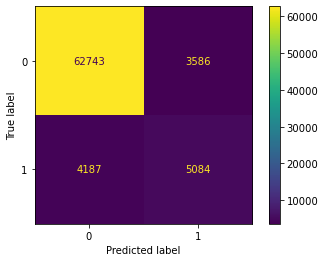

In [19]:
cm = confusion_matrix(y_test,y_pred)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = [0,1])

cm_display.plot()
plt.show()

__Kesimpulan__:
- Berdasarkan data Confusion Matrix tersebut, data matrix didominasi oleh True Negative. Hal Tersebut dapat disebabkan karena Imbalance Label pada dataset yang didominasi oleh Label Negatif (Risk_Flag = 0).
- Pada pemodelan ini kami Fokus ke data __False Negative__, hal tersebut dikarenakan :
    - __False Negative__ mengartikan bahwa __Pelanggan yang seharusnya Gagal Bayar tetapi oleh Model diprediksi Tidak Gagal Bayar__.
    - Jika nilai __Nilai False Negative terlalu besar__, perusahaan akan mengalami beberapa kerugian seperti :
        - Bank dapat mengalami Profit Loss karena Model gagal memprediksi Pelanggan yang Gagal Bayar.
        - Tim Kredit Bank dapat mengalami penurunan performa.
- Maka pada Pemodelan ini akan menggunakan Metric __Recall__ dalam melakukan evaluasi model.
- Tetapi __Score Recall pada model awal sangat rendah__, maka perlu dilakukan __Feature Engineering__.

### Feature Selection Berdasarkan Feature Importances

Akan digunakan Feature Income, Age, Experience dan CURRENT_HOUSE_YRS. Untuk Feature CURRENT_JOB_YRS didrop karena berkorelasi dengan Feature Experience dan memiliki nilai Importances yang lebih kecil dari Feature Experience. 

In [20]:
X = df[['Income','Age','Experience','CURRENT_HOUSE_YRS']]
y = df['Risk_Flag']

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=42)

In [22]:
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train,y_train)

y_pred = rf.predict(X_test)
y_pred_proba = rf.predict_proba(X_test)[:,1]
    
accuracy = metrics.accuracy_score(y_test,y_pred)
print("Accuracy :" + str(round(accuracy*100,2)) + '%')
precission = metrics.precision_score(y_test,y_pred,pos_label=1)
print("Precission :" + str(round(precission*100,2)) + '%')
recall = metrics.recall_score(y_test,y_pred,pos_label=1)
print("Recall :" + str(round(recall*100,2)) + '%')
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred_proba, pos_label=1)
auc_test = metrics.auc(fpr, tpr)
print("AUC : "+str(round(auc_test*100,2))+'%')

Accuracy :89.62%
Precission :58.09%
Recall :55.2%
AUC : 93.42%


Log Performance

In [23]:
perf = {
    "Experiment": "Feature Selection from Feature Importances",
    "Recall": str(round(recall*100,2))+'%',
    "Accuracy": str(round(accuracy*100,2))+'%',
    "Precission": str(round(precission*100,2))+'%',
    "AUC" : str(round(auc_test*100,2))+'%'
}
performance_log = performance_log.append(perf, ignore_index=True)

C:\Users\ASUS\AppData\Local\Temp/ipykernel_15720/2698191364.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  performance_log = performance_log.append(perf, ignore_index=True)


In [24]:
performance_log

,Experiment,Recall,Accuracy,Precission,AUC
0,initial model (Random Forest),54.84%,89.72%,58.64%,93.55%
1,Feature Selection from Feature Importances,55.2%,89.62%,58.09%,93.42%


### Oversampling SMOTE

In [25]:
X_train_SMOTE, y_train_SMOTE = over_sampling.SMOTE().fit_resample(X_train,y_train)

In [26]:
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train_SMOTE,y_train_SMOTE)

y_pred = rf.predict(X_test)
y_pred_proba = rf.predict_proba(X_test)[:,1]
    
accuracy = metrics.accuracy_score(y_test,y_pred)
print("Accuracy :" + str(round(accuracy*100,2)) + '%')
precission = metrics.precision_score(y_test,y_pred,pos_label=1)
print("Precission :" + str(round(precission*100,2)) + '%')
recall = metrics.recall_score(y_test,y_pred,pos_label=1)
print("Recall :" + str(round(recall*100,2)) + '%')
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred_proba, pos_label=1)
auc_test = metrics.auc(fpr, tpr)
print("AUC : "+str(round(auc_test*100,2))+'%')

Accuracy :85.5%
Precission :45.27%
Recall :87.42%
AUC : 93.43%


Log Performance

In [27]:
perf = {
    "Experiment": "Oversampling with SMOTE",
    "Recall": str(round(recall*100,2))+'%',
    "Accuracy": str(round(accuracy*100,2))+'%',
    "Precission": str(round(precission*100,2))+'%',
    "AUC" : str(round(auc_test*100,2))+'%'
}
performance_log = performance_log.append(perf, ignore_index=True)

performance_log

C:\Users\ASUS\AppData\Local\Temp/ipykernel_15720/1963978351.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  performance_log = performance_log.append(perf, ignore_index=True)


,Experiment,Recall,Accuracy,Precission,AUC
0,initial model (Random Forest),54.84%,89.72%,58.64%,93.55%
1,Feature Selection from Feature Importances,55.2%,89.62%,58.09%,93.42%
2,Oversampling with SMOTE,87.42%,85.5%,45.27%,93.43%


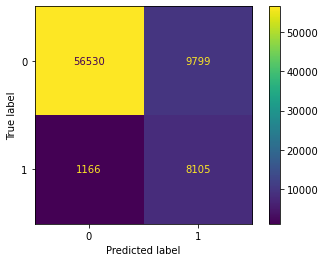

In [28]:
cm = confusion_matrix(y_test,y_pred)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = [0,1])

cm_display.plot()
plt.show()

__Kesimpulan__ :

- Setelah dilakukan beberapa Feature Engineering seperti Feature Selection dan Oversampling SMOTE, Score Recall mengalami kenaikan.
- Nilai __False Negative__ mengalami penurunan.

## Model Evaluation : Apakah model sudah best-fit?

### Melihat Score Train dan Score Test

In [29]:
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train_SMOTE,y_train_SMOTE)

RandomForestClassifier(random_state=42)

In [30]:
y_pred = rf.predict(X_test)
y_pred_proba = rf.predict_proba(X_test)[:,1]
y_pred_train = rf.predict(X_train_SMOTE)
y_pred_proba_train = rf.predict_proba(X_train_SMOTE)[:,1]
    
accuracy_test = metrics.accuracy_score(y_test,y_pred)
print("Accuracy Test :" + str(round(accuracy_test*100,2)) + '%')
accuracy_train = metrics.accuracy_score(y_train_SMOTE,y_pred_train)
print("Accuracy Train :" + str(round(accuracy_train*100,2)) + '%')
    
precission_test = metrics.precision_score(y_test,y_pred,pos_label=1)
print("Precission Test :" + str(round(precission_test*100,2)) + '%')
precission_train = metrics.precision_score(y_train_SMOTE,y_pred_train,pos_label=1)
print("Precission Train:" + str(round(precission_train*100,2)) + '%')

recall_test = metrics.recall_score(y_test,y_pred,pos_label=1)
print("Recall Test :" + str(round(recall_test*100,2)) + '%')
recall_train = metrics.recall_score(y_train_SMOTE,y_pred_train,pos_label=1)
print("Recall Train :" + str(round(recall_train*100,2)) + '%')

f1_test = metrics.f1_score(y_test,y_pred,pos_label=1)
print("F1 Test :" + str(round(f1_test*100,2)) + '%')
f1_train = metrics.f1_score(y_train_SMOTE,y_pred_train,pos_label=1)
print("F1 Train :" + str(round(f1_train*100,2)) + '%')

fpr_test, tpr_test, thresholds_test = metrics.roc_curve(y_test, y_pred_proba, pos_label=1)
auc_test = metrics.auc(fpr_test, tpr_test)
print("AUC Test : "+str(round(auc_test*100,2))+'%')
fpr_train, tpr_train, thresholds_train = metrics.roc_curve(y_train_SMOTE, y_pred_proba_train, pos_label=1)
auc_train = metrics.auc(fpr_train, tpr_train)
print("AUC Train : "+str(round(auc_train*100,2))+'%')
print("\n")

Accuracy Test :85.5%
Accuracy Train :95.8%
Precission Test :45.27%
Precission Train:92.29%
Recall Test :87.42%
Recall Train :99.96%
F1 Test :59.65%
F1 Train :95.97%
AUC Test : 93.43%
AUC Train : 97.13%




__Kesimpulan__ :
- Terlihat __Score Train > Score Test__ untuk Metric Recall, maka Model masih termasuk __Overfitting__.
- Untuk mengatasi Overfitting tersebut perlu dilakukan __Hyperparameter Tuning__.

## Hyper-Paramater Tuning

### Hyper-Parameter Tuning dengan RandomizedSearch

In [31]:
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV

In [32]:
hyperparams = dict(
                        n_estimators = [int(x) for x in np.linspace(10,100,20)],
                        min_samples_split = [int(x) for x in np.linspace(2,20,10)],
                        min_samples_leaf = [int(x) for x in np.linspace(2,20,10)],
                        max_depth = [int(x) for x in np.linspace(2,100,10)]   
                    )

In [33]:
rf = RandomForestClassifier(random_state=42)
rs = RandomizedSearchCV(rf, hyperparams, scoring='roc_auc', random_state=42, cv=5)
rs.fit(X_train_SMOTE,y_train_SMOTE)

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42),
                   param_distributions={'max_depth': [2, 12, 23, 34, 45, 56, 67,
                                                      78, 89, 100],
                                        'min_samples_leaf': [2, 4, 6, 8, 10, 12,
                                                             14, 16, 18, 20],
                                        'min_samples_split': [2, 4, 6, 8, 10,
                                                              12, 14, 16, 18,
                                                              20],
                                        'n_estimators': [10, 14, 19, 24, 28, 33,
                                                         38, 43, 47, 52, 57, 62,
                                                         66, 71, 76, 81, 85, 90,
                                                         95, 100]},
                   random_state=42, scoring='roc_auc')

In [34]:
y_pred = rs.predict(X_test)
y_pred_proba = rs.predict_proba(X_test)[:,1]
y_pred_train = rs.predict(X_train_SMOTE)
y_pred_proba_train = rs.predict_proba(X_train_SMOTE)[:,1]
    
accuracy_test = metrics.accuracy_score(y_test,y_pred)
print("Accuracy Test :" + str(round(accuracy_test*100,2)) + '%')
accuracy_train = metrics.accuracy_score(y_train_SMOTE,y_pred_train)
print("Accuracy Train :" + str(round(accuracy_train*100,2)) + '%')
    
precission_test = metrics.precision_score(y_test,y_pred,pos_label=1)
print("Precission Test :" + str(round(precission_test*100,2)) + '%')
precission_train = metrics.precision_score(y_train_SMOTE,y_pred_train,pos_label=1)
print("Precission Train:" + str(round(precission_train*100,2)) + '%')

recall_test = metrics.recall_score(y_test,y_pred,pos_label=1)
print("Recall Test :" + str(round(recall_test*100,2)) + '%')
recall_train = metrics.recall_score(y_train_SMOTE,y_pred_train,pos_label=1)
print("Recall Train :" + str(round(recall_train*100,2)) + '%')

f1_test = metrics.f1_score(y_test,y_pred,pos_label=1)
print("F1 Test :" + str(round(f1_test*100,2)) + '%')
f1_train = metrics.f1_score(y_train_SMOTE,y_pred_train,pos_label=1)
print("F1 Train :" + str(round(f1_train*100,2)) + '%')

fpr_test, tpr_test, thresholds_test = metrics.roc_curve(y_test, y_pred_proba, pos_label=1)
auc_test = metrics.auc(fpr_test, tpr_test)
print("AUC Test : "+str(round(auc_test*100,2))+'%')
fpr_train, tpr_train, thresholds_train = metrics.roc_curve(y_train_SMOTE, y_pred_proba_train, pos_label=1)
auc_train = metrics.auc(fpr_train, tpr_train)
print("AUC Train : "+str(round(auc_train*100,2))+'%')

Accuracy Test :86.03%
Accuracy Train :92.68%
Precission Test :46.28%
Precission Train:89.34%
Recall Test :86.4%
Recall Train :96.92%
F1 Test :60.28%
F1 Train :92.98%
AUC Test : 93.47%
AUC Train : 95.9%


In [35]:
for key, value in hyperparams.items() :
        print(key+':', rs.best_estimator_.get_params()[key])

n_estimators: 33
min_samples_split: 8
min_samples_leaf: 4
max_depth: 34


Log Perfromance

In [36]:
perf = {
    "Experiment": "Hyperparameters Tuning using Randomized Search",
    "Recall": str(round(recall_test*100,2))+'%',
    "Accuracy": str(round(accuracy_test*100,2))+'%',
    "Precission": str(round(precission_test*100,2))+'%',
    "AUC" : str(round(auc_test*100,2))+'%'
}
performance_log = performance_log.append(perf, ignore_index=True)

performance_log

C:\Users\ASUS\AppData\Local\Temp/ipykernel_15720/315885886.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  performance_log = performance_log.append(perf, ignore_index=True)


,Experiment,Recall,Accuracy,Precission,AUC
0,initial model (Random Forest),54.84%,89.72%,58.64%,93.55%
1,Feature Selection from Feature Importances,55.2%,89.62%,58.09%,93.42%
2,Oversampling with SMOTE,87.42%,85.5%,45.27%,93.43%
3,Hyperparameters Tuning using Randomized Search,86.4%,86.03%,46.28%,93.47%


### Find The Best Parameters

#### Mencari Parameter n_estimators

param value: 10; train: 0.995358008727978; test: 0.8652788264480639
param value: 12; train: 0.9969419751090998; test: 0.8645237838420883
param value: 14; train: 0.9976466785194763; test: 0.8639844676949627
param value: 16; train: 0.9981832875383869; test: 0.8700248085427678
param value: 18; train: 0.9984806853079037; test: 0.8688383130190918
param value: 20; train: 0.9988233392597382; test: 0.867975407183691
param value: 22; train: 0.9988491999353483; test: 0.8680832704131162
param value: 24; train: 0.9990884111847422; test: 0.8692697659367922
param value: 26; train: 0.9991207370292549; test: 0.8723977995901198
param value: 28; train: 0.9993534831097463; test: 0.8734764318843706
param value: 31; train: 0.9994569258121868; test: 0.8772516449142488
param value: 33; train: 0.9994763213188944; test: 0.8760651493905728
param value: 35; train: 0.9993793437853564; test: 0.8760651493905728
param value: 37; train: 0.9995151123323097; test: 0.8757415597022975
param value: 39; train: 0.9995345078

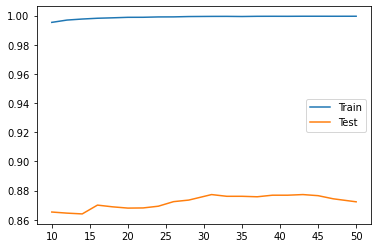

In [37]:
param_values = [int(x) for x in np.linspace(10,50,20)]
train_scores = []
test_scores = []

for c in param_values:
    model = RandomForestClassifier(n_estimators=c)
    model.fit(X_train_SMOTE, y_train_SMOTE)

    # eval on train
    y_pred_train = model.predict(X_train_SMOTE)
    train_rec = metrics.recall_score(y_train_SMOTE, y_pred_train,pos_label=1)
    train_scores.append(train_rec)

    # eval on test
    y_pred = model.predict(X_test)
    test_rec = metrics.recall_score(y_test, y_pred,pos_label=1)
    test_scores.append(test_rec)

    print('param value: ' + str(c) + '; train: ' + str(train_rec) + '; test: '+ str(test_rec))

plt.plot(param_values, train_scores, label='Train')
plt.plot(param_values, test_scores, label='Test')
plt.legend()
plt.show()

#### Mencari Parameter min_samples_split

param value: 2; train: 0.9994504606432844; test: 0.8761730126199978
param value: 4; train: 0.9973169549054469; test: 0.8748786538668968
param value: 6; train: 0.9960045256182318; test: 0.8778988242907992
param value: 8; train: 0.995021819945046; test: 0.8813504476324021
param value: 10; train: 0.994924842411508; test: 0.8804875417970014
param value: 12; train: 0.9944722805883304; test: 0.882321216697228
param value: 14; train: 0.9940843704541781; test: 0.8822133534678028
param value: 16; train: 0.9925262647486666; test: 0.882429079926653
param value: 18; train: 0.988563116211411; test: 0.8759572861611477
param value: 20; train: 0.9851753677064813; test: 0.871534893754719
param value: 22; train: 0.9795054145789559; test: 0.8670046381188653
param value: 24; train: 0.9737061580733797; test: 0.8626901089418617
param value: 26; train: 0.9710619039922418; test: 0.8602092546650847
param value: 28; train: 0.9671957329885243; test: 0.8562183151763564
param value: 30; train: 0.9638209148213998; 

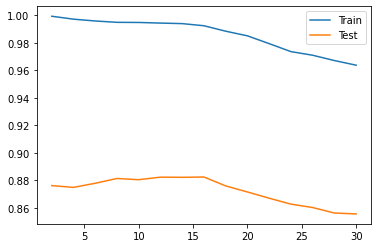

In [38]:
param_values = [int(x) for x in np.linspace(2,30,15)]
train_scores = []
test_scores = []

for c in param_values:
    model = RandomForestClassifier(n_estimators=31,min_samples_split=c)
    model.fit(X_train_SMOTE, y_train_SMOTE)

    # eval on train
    y_pred_train = model.predict(X_train_SMOTE)
    train_rec = metrics.recall_score(y_train_SMOTE, y_pred_train,pos_label=1)
    train_scores.append(train_rec)

    # eval on test
    y_pred = model.predict(X_test)
    test_rec = metrics.recall_score(y_test, y_pred,pos_label=1)
    test_scores.append(test_rec)

    print('param value: ' + str(c) + '; train: ' + str(train_rec) + '; test: '+ str(test_rec))

plt.plot(param_values, train_scores, label='Train')
plt.plot(param_values, test_scores, label='Test')
plt.legend()
plt.show()

#### Mencari Parameter min_samples_leaf

param value: 2; train: 0.9831711653466947; test: 0.8757415597022975
param value: 4; train: 0.968850816227574; test: 0.8632294250889871
param value: 7; train: 0.9471343138839502; test: 0.8500701110991263
param value: 10; train: 0.9298917084208825; test: 0.843598317333621
param value: 13; train: 0.9159915952804267; test: 0.836263617732715
param value: 16; train: 0.9036366575076774; test: 0.8294682342789343
param value: 18; train: 0.8971520930984322; test: 0.8259087477079063
param value: 21; train: 0.8864393082269274; test: 0.8205155862366519
param value: 24; train: 0.8774397931145951; test: 0.8180347319598749
param value: 27; train: 0.8732438984968482; test: 0.815769604141948
param value: 30; train: 0.8690415387101988; test: 0.8143673821594218


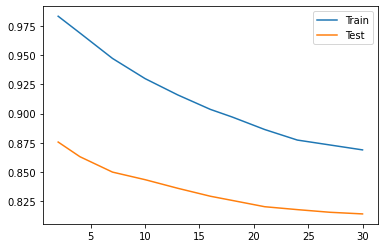

In [40]:
param_values = [int(x) for x in np.linspace(2,30,11)]
train_scores = []
test_scores = []

for c in param_values:
    model = RandomForestClassifier(n_estimators=31,min_samples_split=16,min_samples_leaf=c)
    model.fit(X_train_SMOTE, y_train_SMOTE)

    # eval on train
    y_pred_train = model.predict(X_train_SMOTE)
    train_rec = metrics.recall_score(y_train_SMOTE, y_pred_train,pos_label=1)
    train_scores.append(train_rec)

    # eval on test
    y_pred = model.predict(X_test)
    test_rec = metrics.recall_score(y_test, y_pred,pos_label=1)
    test_scores.append(test_rec)

    print('param value: ' + str(c) + '; train: ' + str(train_rec) + '; test: '+ str(test_rec))

plt.plot(param_values, train_scores, label='Train')
plt.plot(param_values, test_scores, label='Test')
plt.legend()
plt.show()

#### Mencari Parameter max_depth

param value: 2; train: 0.6504347826086957; test: 0.6101822888577284
param value: 5; train: 0.6997381606594473; test: 0.6539747600043145
param value: 8; train: 0.783487958622919; test: 0.7284003883076259
param value: 12; train: 0.8791918538871828; test: 0.8130730234063208
param value: 15; train: 0.9010182641021497; test: 0.8293603710495092
param value: 19; train: 0.9153062873767577; test: 0.8374501132563908
param value: 22; train: 0.931798933247131; test: 0.842411821809945
param value: 26; train: 0.940901891061904; test: 0.8450005393161472
param value: 29; train: 0.9451301115241636; test: 0.8496386581814259
param value: 32; train: 0.9463390981089381; test: 0.8507172904756768
param value: 36; train: 0.9483756263132375; test: 0.8516880595405026
param value: 39; train: 0.946746403749798; test: 0.8517959227699278
param value: 43; train: 0.9461903992241797; test: 0.8483442994283249
param value: 46; train: 0.947360594795539; test: 0.8499622478697012
param value: 50; train: 0.9457313722320996;

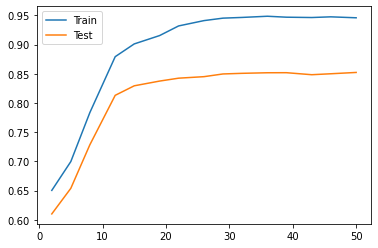

In [43]:
param_values = [int(x) for x in np.linspace(2,50,15)]
train_scores = []
test_scores = []

for c in param_values:
    model = RandomForestClassifier(n_estimators=31,min_samples_split=16,min_samples_leaf=7,max_depth=c)
    model.fit(X_train_SMOTE, y_train_SMOTE)

    # eval on train
    y_pred_train = model.predict(X_train_SMOTE)
    train_rec = metrics.recall_score(y_train_SMOTE, y_pred_train,pos_label=1)
    train_scores.append(train_rec)

    # eval on test
    y_pred = model.predict(X_test)
    test_rec = metrics.recall_score(y_test, y_pred,pos_label=1)
    test_scores.append(test_rec)

    print('param value: ' + str(c) + '; train: ' + str(train_rec) + '; test: '+ str(test_rec))

plt.plot(param_values, train_scores, label='Train')
plt.plot(param_values, test_scores, label='Test')
plt.legend()
plt.show()

In [44]:
rf = RandomForestClassifier(n_estimators = 31, max_depth = 15, min_samples_split = 16, min_samples_leaf = 7, random_state=42)
rf.fit(X_train_SMOTE,y_train_SMOTE)

RandomForestClassifier(max_depth=15, min_samples_leaf=7, min_samples_split=16,
                       n_estimators=31, random_state=42)

In [45]:
y_pred = rf.predict(X_test)
y_pred_proba = rf.predict_proba(X_test)[:,1]
y_pred_train = rf.predict(X_train_SMOTE)
y_pred_proba_train = rf.predict_proba(X_train_SMOTE)[:,1]
    
accuracy_test = metrics.accuracy_score(y_test,y_pred)
print("Accuracy Test :" + str(round(accuracy_test*100,2)) + '%')
accuracy_train = metrics.accuracy_score(y_train_SMOTE,y_pred_train)
print("Accuracy Train :" + str(round(accuracy_train*100,2)) + '%')
    
precission_test = metrics.precision_score(y_test,y_pred,pos_label=1)
print("Precission Test :" + str(round(precission_test*100,2)) + '%')
precission_train = metrics.precision_score(y_train_SMOTE,y_pred_train,pos_label=1)
print("Precission Train:" + str(round(precission_train*100,2)) + '%')

recall_test = metrics.recall_score(y_test,y_pred,pos_label=1)
print("Recall Test :" + str(round(recall_test*100,2)) + '%')
recall_train = metrics.recall_score(y_train_SMOTE,y_pred_train,pos_label=1)
print("Recall Train :" + str(round(recall_train*100,2)) + '%')

f1_test = metrics.f1_score(y_test,y_pred,pos_label=1)
print("F1 Test :" + str(round(f1_test*100,2)) + '%')
f1_train = metrics.f1_score(y_train_SMOTE,y_pred_train,pos_label=1)
print("F1 Train :" + str(round(f1_train*100,2)) + '%')

fpr_test, tpr_test, thresholds_test = metrics.roc_curve(y_test, y_pred_proba, pos_label=1)
auc_test = metrics.auc(fpr_test, tpr_test)
print("AUC Test : "+str(round(auc_test*100,2))+'%')
fpr_train, tpr_train, thresholds_train = metrics.roc_curve(y_train_SMOTE, y_pred_proba_train, pos_label=1)
auc_train = metrics.auc(fpr_train, tpr_train)
print("AUC Train : "+str(round(auc_train*100,2))+'%')
print("\n")

Accuracy Test :77.53%
Accuracy Train :83.96%
Precission Test :33.33%
Precission Train:80.27%
Recall Test :83.25%
Recall Train :90.06%
F1 Test :47.61%
F1 Train :84.88%
AUC Test : 87.49%
AUC Train : 91.62%




In [46]:
perf = {
    "Experiment": "Find the best parameters",
    "Recall": str(round(recall_test*100,2))+'%',
    "Accuracy": str(round(accuracy_test*100,2))+'%',
    "Precission": str(round(precission_test*100,2))+'%',
    "AUC" : str(round(auc_test*100,2))+'%'
}
performance_log = performance_log.append(perf, ignore_index=True)

performance_log

C:\Users\ASUS\AppData\Local\Temp/ipykernel_15720/3423303514.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  performance_log = performance_log.append(perf, ignore_index=True)


,Experiment,Recall,Accuracy,Precission,AUC
0,initial model (Random Forest),54.84%,89.72%,58.64%,93.55%
1,Feature Selection from Feature Importances,55.2%,89.62%,58.09%,93.42%
2,Oversampling with SMOTE,87.42%,85.5%,45.27%,93.43%
3,Hyperparameters Tuning using Randomized Search,86.4%,86.03%,46.28%,93.47%
4,Find the best parameters,83.25%,77.53%,33.33%,87.49%
